 **TIỀN XỬ LÝ DATA**

In [101]:
pip uninstall scikit-learn imbalanced-learn -y


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1


  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl.metadata (8.2 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, confusion_matrix, recall_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import xgboost as xgb

**Reading .csv file**

In [104]:
data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


**Exploring Data**

In [105]:
data.shape

(100000, 9)

In [106]:
data.isna().sum()
#Không có cột nào bị thiếu giá trị

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [107]:
#Check kiểu dữ liệu
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [109]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [110]:
# Đặt lại tên cho các cột

data.columns = ['gender', 'age', 'hypertension', 
                'heart_disease', 'smoking_history','bmi_score', 
                'haemoglobin_level', 'blood_glucose_level', 'is_diabetic']

In [111]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [112]:
#Kiểm tra về giới tính
data.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [113]:
data.age.value_counts()

age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
1.00       83
0.48       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

**Chuyển age từ float sang int**

In [114]:
data.age = data.age.astype(int)
data.age.dtype

dtype('int64')

In [115]:
data.age.value_counts()

age
80    5621
51    1619
47    1574
48    1568
53    1542
      ... 
76     733
77     730
75     721
78     682
79     621
Name: count, Length: 81, dtype: int64

In [116]:
print(data.age.max())
print(data.age.min())

80
0


In [117]:
#Tiền sử huyết áp
data.hypertension.value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [118]:
#Tim mạch
data.heart_disease.value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [119]:
# Hút thuốc

data.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [120]:
#Xử lý dữ liệu hút thuốc
def clean_smoking_history(value):
    
    if value == "No Info":
        return "no info"
    elif value == "ever":
        return "current"
    elif value == "not current":
        return "former"
    else:
        return value
    
data.smoking_history = data.smoking_history.apply(clean_smoking_history)

In [121]:
data.smoking_history.value_counts()

smoking_history
no info    35816
never      35095
former     15799
current    13290
Name: count, dtype: int64

In [122]:
#Chỉ số BMI
data.bmi_score.value_counts()

bmi_score
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
54.29        1
55.18        1
53.41        1
11.75        1
12.77        1
Name: count, Length: 4247, dtype: int64

In [123]:
print(data.bmi_score.max())
print(data.bmi_score.min())

95.69
10.01


In [124]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,no info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [125]:
#Nồng độ huyết sắc tố
data.haemoglobin_level.value_counts()

haemoglobin_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.2     661
8.8     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

In [126]:
print(data.haemoglobin_level.max())
print(data.haemoglobin_level.min())

9.0
3.5


In [127]:
#Nồng độ glucose trong máu
data.blood_glucose_level.value_counts()

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [128]:
print(data.blood_glucose_level.max())
print(data.blood_glucose_level.min())

300
80


**Bộ dữ liệu hiện tại đang bị mất cân bằng giữa 0 và 1 ở trường is_diabetes vì thế cần dùng các ký thuật xử lý như Over sampling/Undersampling/SMOTE**

In [129]:
#tính toán ma trận hệ số tương quan giữa các cột số
data_numeric = data.select_dtypes(include=['int64', 'float64'])
data_numeric.corr()


,age,hypertension,heart_disease,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi_score,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
haemoglobin_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
is_diabetic,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


**Các biến có ý nghĩa quan trọng nhất để dự đoán tiểu đường (is_diabetic) là:**
* blood_glucose_level ( 0.419558 )
* haemoglobin_level ( 0.400660 )


*Ưu tiên các biến này trong quá trình huấn luyện mô hình.*



<Axes: >

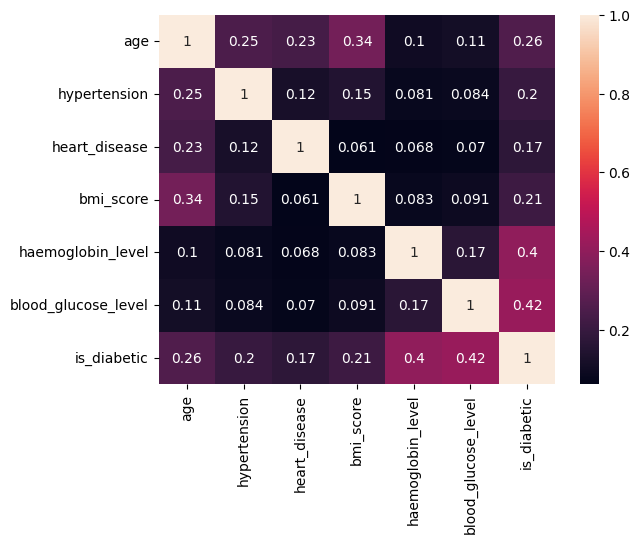

In [130]:
#Vẽ heatmap
corr_matrix = data_numeric.corr()
sns.heatmap(corr_matrix, annot = True)

In [131]:
# Chuyển hypertension và heart_disease sang object datatype. 
# Sử dụng cho phân loại nhị phân, giúp mô hình không bị hiểu là biến số học
data.hypertension = np.where((data.hypertension == 1), "Yes", "No")
data.heart_disease = np.where((data.heart_disease == 1), "Yes", "No")

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi_score            100000 non-null  float64
 6   haemoglobin_level    100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   is_diabetic          100000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [133]:
data.to_csv("/kaggle/working/diabetes_clean.csv", index = False)

In [134]:
data = pd.read_csv("/kaggle/working/diabetes_clean.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80,No,Yes,never,25.19,6.6,140,0
1,Female,54,No,No,no info,27.32,6.6,80,0
2,Male,28,No,No,never,27.32,5.7,158,0
3,Female,36,No,No,current,23.45,5.0,155,0
4,Male,76,Yes,Yes,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80,No,No,no info,27.32,6.2,90,0
99996,Female,2,No,No,no info,17.37,6.5,100,0
99997,Male,66,No,No,former,27.83,5.7,155,0
99998,Female,24,No,No,never,35.42,4.0,100,0


**Phân tích data**

<Axes: xlabel='gender', ylabel='count'>

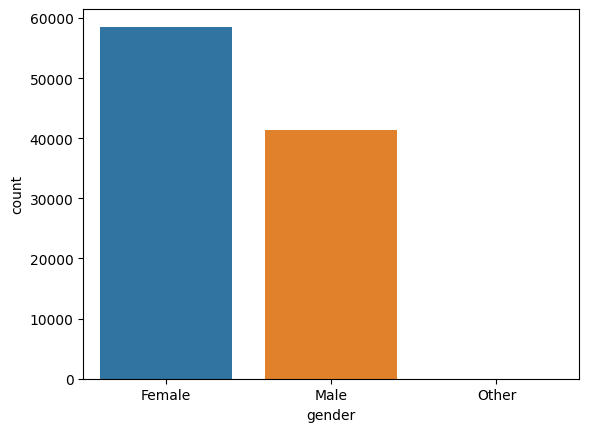

In [135]:
sns.countplot(data = data, x = "gender")

<Axes: xlabel='hypertension', ylabel='count'>

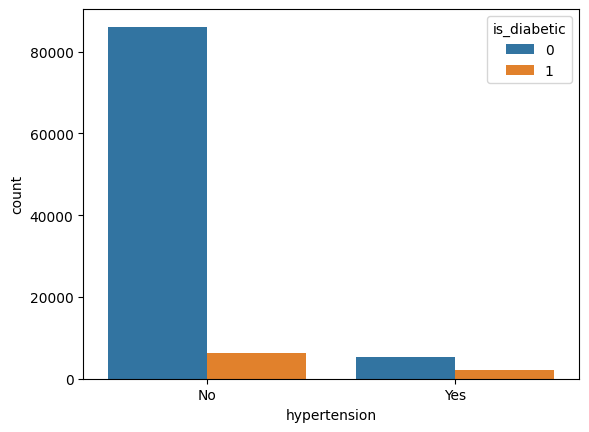

In [136]:
sns.countplot(data = data, x = "hypertension", hue = "is_diabetic")

<Axes: xlabel='heart_disease', ylabel='count'>

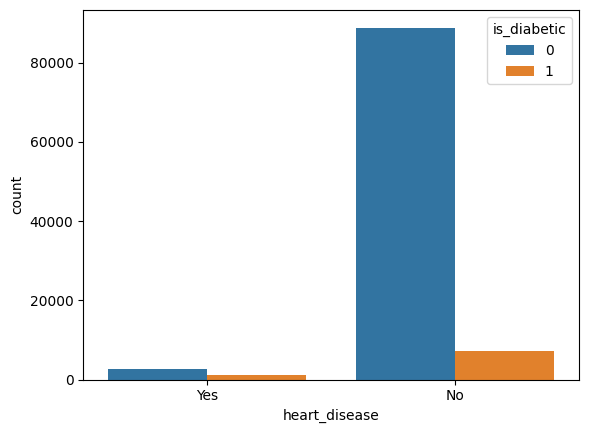

In [137]:
sns.countplot(data = data, x = "heart_disease", hue = "is_diabetic")

<Axes: xlabel='smoking_history', ylabel='count'>

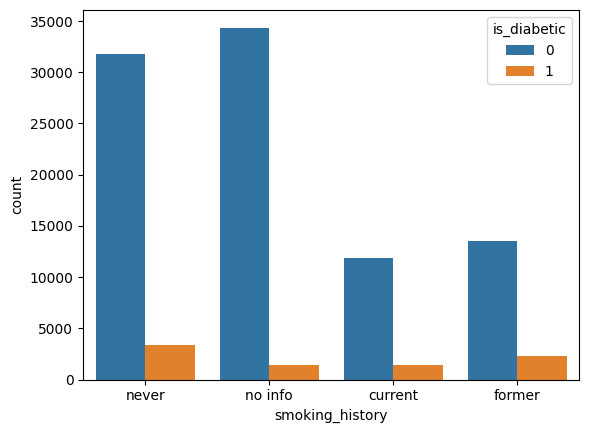

In [138]:
sns.countplot(data = data, x = "smoking_history", hue = "is_diabetic")

<Axes: xlabel='is_diabetic', ylabel='count'>

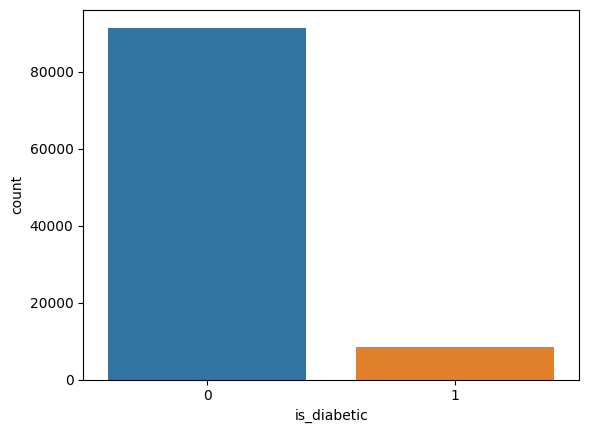

In [139]:
sns.countplot(data = data, x = "is_diabetic")

<Axes: xlabel='age'>

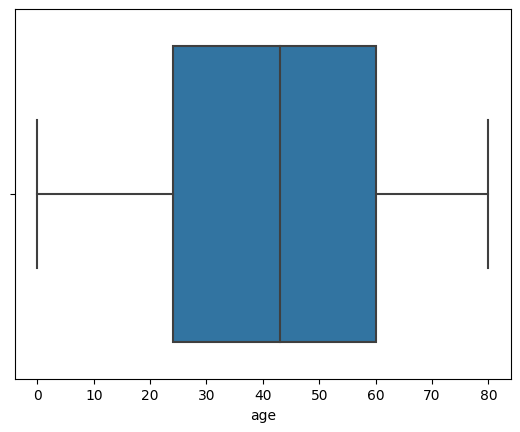

In [140]:
#Xem phân bố tuổi (age) trong dữ liệu
sns.boxplot(data = data, x = "age")

**Không bị outliers**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Count'>

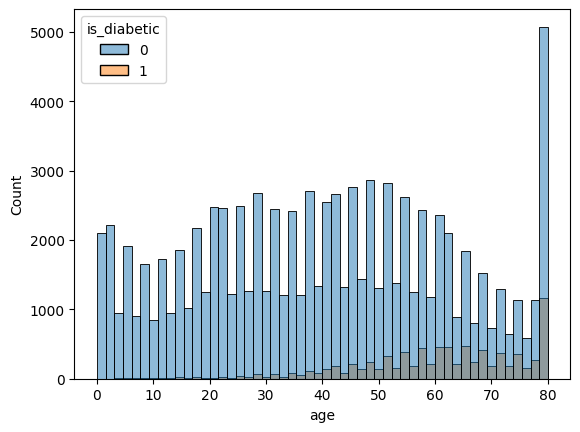

In [141]:
sns.histplot(data = data, x = "age", hue = "is_diabetic")

**Những người 80 tuổi có tỷ lệ mắc bệnh cao nhất**

<Axes: xlabel='bmi_score'>

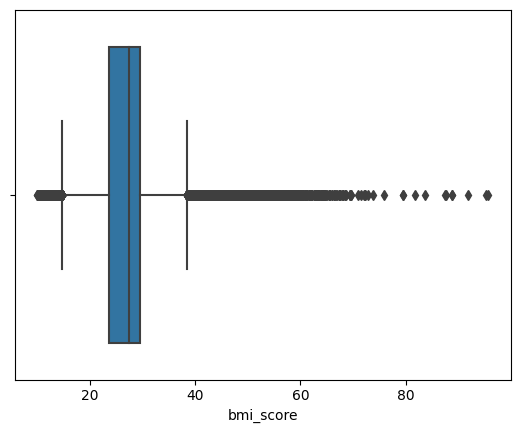

In [142]:
sns.boxplot(data = data, x = "bmi_score")

**Bị outliers ở những giá trị nằm ngoài 70**

In [143]:
# Q1 = data["bmi_score"].quantile(0.25)
# Q3 = data["bmi_score"].quantile(0.75)
# IQR = Q3 - Q1

# # Giữ lại những giá trị không phải outlier
# filtered_data = data[(data["bmi_score"] >= Q1 - 1.5 * IQR) & 
#                      (data["bmi_score"] <= Q3 + 1.5 * IQR)]


In [144]:
# sns.boxplot(data=filtered_data, x="bmi_score")


<Axes: xlabel='haemoglobin_level'>

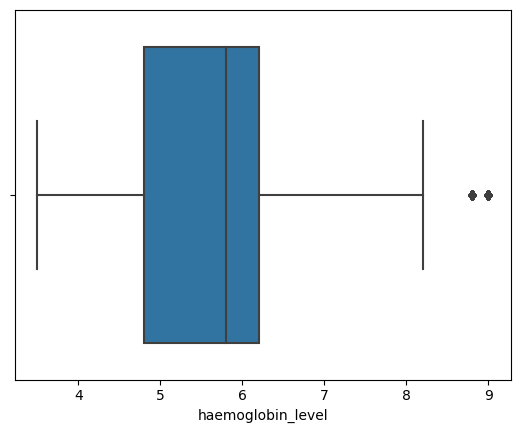

In [145]:

sns.boxplot(data = data, x = "haemoglobin_level")

**Có 2 giá trị outliers**

In [146]:
# Q1 = data["haemoglobin_level"].quantile(0.25)
# Q3 = data["haemoglobin_level"].quantile(0.75)
# IQR = Q3 - Q1

# # Giữ lại những giá trị không phải outlier
# filtered_data = data[(data["haemoglobin_level"] >= Q1 - 1.5 * IQR) & 
#                      (data["haemoglobin_level"] <= Q3 + 1.5 * IQR)]


In [147]:
# sns.boxplot(data=filtered_data, x="haemoglobin_level")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


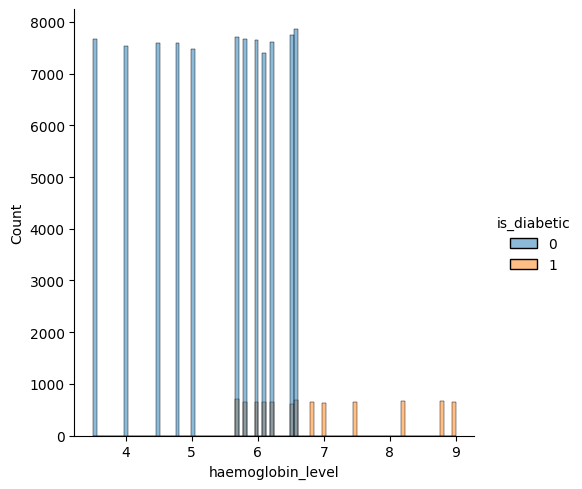

In [148]:
sns.displot(data = data, x = "haemoglobin_level", hue = "is_diabetic")

**Những người có haemoglobin_level trong khoảng 6.5 đến 9 bị bệnh. Và trong khoảng 5.5 đến 6.5 sẽ có tỷ lệ mắc bệnh**

<Axes: xlabel='blood_glucose_level'>

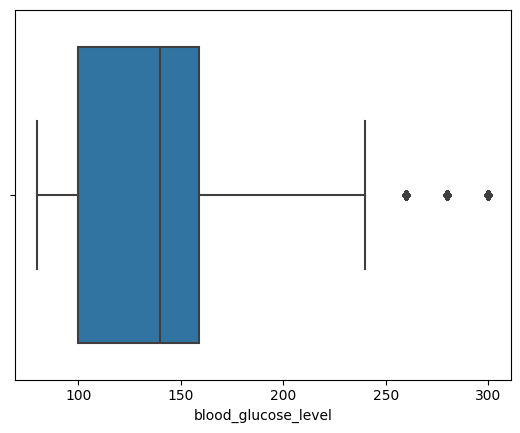

In [149]:
sns.boxplot(data = data, x = "blood_glucose_level")

**Có 3 giá trị bị outliers**

In [150]:
# Q1 = data["blood_glucose_level"].quantile(0.25)
# Q3 = data["blood_glucose_level"].quantile(0.75)
# IQR = Q3 - Q1

# # Giữ lại những giá trị không phải outlier
# filtered_data = data[(data["blood_glucose_level"] >= Q1 - 1.5 * IQR) &
#                      (data["blood_glucose_level"] <= Q3 + 1.5 * IQR)]

In [151]:
# sns.boxplot(data = filtered_data, x = "blood_glucose_level")


**Những người có blood_glucose_level từ 250 đến 300 bị mắc bệnh. Và từ 120 đến 200 sẽ có tỷ lệ mắc bệnh**

In [152]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80,No,Yes,never,25.19,6.6,140,0
1,Female,54,No,No,no info,27.32,6.6,80,0
2,Male,28,No,No,never,27.32,5.7,158,0
3,Female,36,No,No,current,23.45,5.0,155,0
4,Male,76,Yes,Yes,current,20.14,4.8,155,0


Text(0.5, 1.0, 'Relation between blood_glucose_level and is_diabetic')

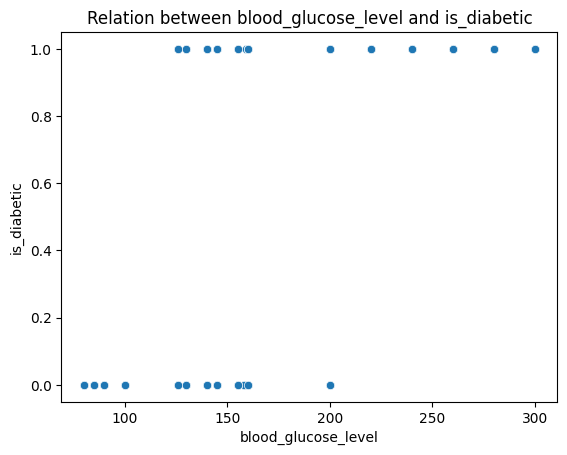

In [153]:
#biểu đồ phân tán thể hiện mối quan hệ giữa biến blood_glucose_level và is_diabetic
sns.scatterplot(data = data, x = "blood_glucose_level", y = "is_diabetic")
plt.title("Relation between blood_glucose_level and is_diabetic")

**Những người bị tiểu đường có glucose vướt quá 125. Tuy nhiên có những người từ 125-200 lại không bị tiểu đường. Đây không phải yếu tố duy nhất gây ra bệnh tiểu đường**

<Axes: xlabel='haemoglobin_level', ylabel='is_diabetic'>

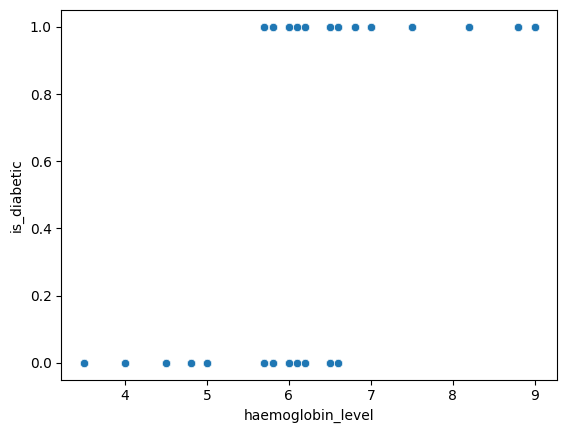

In [154]:
sns.scatterplot(data = data, x = "haemoglobin_level", y = "is_diabetic")

In [155]:
y = data.is_diabetic
X = data.drop(["is_diabetic"], axis = 1)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
display(X_train.shape)
display(X_test.shape)

display(y_train.shape)
display(y_test.shape)

(80000, 8)

(20000, 8)

(80000,)

(20000,)

In [158]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [159]:
X_train_num.head()

,age,bmi_score,haemoglobin_level,blood_glucose_level
75220,73,24.77,3.5,80
48955,80,24.60,5.7,145
44966,38,24.33,4.0,158
13568,26,18.87,5.0,100
92727,61,22.11,4.5,85


In [160]:
X_train_cat.head()

,gender,hypertension,heart_disease,smoking_history
75220,Male,No,No,former
48955,Male,No,No,never
44966,Female,No,No,current
13568,Female,No,No,former
92727,Female,Yes,No,current


**Encoding**

In [161]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_encoded = pd.DataFrame(encoded_cat, columns=cols)
X_train_encoded

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
79995,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79996,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79997,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79998,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [162]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
X_test_encoded = pd.DataFrame(encoded_test_cat, columns=cols)
X_test_encoded

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19996,1.0,0.0,1.0,0.0,1.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19998,1.0,0.0,0.0,1.0,0.0,0.0,1.0


**Scaling**

In [163]:
transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled

,age,bmi_score,haemoglobin_level,blood_glucose_level
0,0.9125,0.180418,0.000000,0.000000
1,1.0000,0.178340,0.400000,0.295455
2,0.4750,0.175040,0.090909,0.354545
3,0.3250,0.108300,0.272727,0.090909
4,0.7625,0.147904,0.181818,0.022727
...,...,...,...,...
79995,0.6125,0.280773,0.400000,0.000000
79996,0.1875,0.221122,0.272727,0.359091
79997,0.5250,0.197164,0.418182,0.022727
79998,0.4625,0.182740,0.490909,0.354545


In [164]:
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled

,age,bmi_score,haemoglobin_level,blood_glucose_level
0,0.1625,0.132135,0.418182,0.209091
1,0.0375,0.134336,0.272727,0.295455
2,0.7875,0.187141,0.000000,0.545455
3,0.0250,0.090698,0.472727,0.209091
4,0.4125,0.367559,0.490909,0.545455
...,...,...,...,...
19995,0.5500,0.145948,0.454545,0.359091
19996,0.7625,0.390784,0.000000,0.045455
19997,0.6125,0.201687,0.236364,0.090909
19998,0.9125,0.211588,0.563636,0.090909


**Concatenating encoded and scaled columns**

In [165]:
X_train_processed = pd.concat([X_train_encoded, X_train_scaled], axis = 1)
X_test_processed = pd.concat([X_test_encoded, X_test_scaled], axis = 1)

In [166]:
X_train_processed

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.9125,0.180418,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0000,0.178340,0.400000,0.295455
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4750,0.175040,0.090909,0.354545
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.3250,0.108300,0.272727,0.090909
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.7625,0.147904,0.181818,0.022727
...,...,...,...,...,...,...,...,...,...,...,...
79995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6125,0.280773,0.400000,0.000000
79996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.1875,0.221122,0.272727,0.359091
79997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5250,0.197164,0.418182,0.022727
79998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4625,0.182740,0.490909,0.354545


In [167]:
X_test_processed

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1625,0.132135,0.418182,0.209091
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0375,0.134336,0.272727,0.295455
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.7875,0.187141,0.000000,0.545455
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0250,0.090698,0.472727,0.209091
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.4125,0.367559,0.490909,0.545455
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5500,0.145948,0.454545,0.359091
19996,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.7625,0.390784,0.000000,0.045455
19997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6125,0.201687,0.236364,0.090909
19998,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.9125,0.211588,0.563636,0.090909


In [190]:
y_train = y_train.reset_index(drop=True)

In [191]:
# Nếu y_train là một numpy array hoặc list, convert thành Series
if isinstance(y_train, (list, np.ndarray)):
    y_train = pd.Series(y_train, name="is_diabetic")

# Nếu là Series nhưng không có tên cột
elif isinstance(y_train, pd.Series) and y_train.name is None:
    y_train.name = "is_diabetic"

# Gộp lại thành DataFrame
train = pd.concat([X_train_processed, y_train], axis=1)

print(train.shape)
train.head()

(80000, 12)


,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.9125,0.180418,0.000000,0.000000,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0000,0.178340,0.400000,0.295455,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4750,0.175040,0.090909,0.354545,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.3250,0.108300,0.272727,0.090909,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.7625,0.147904,0.181818,0.022727,0


In [192]:
y_train

0        0
1        1
2        0
3        0
4        0
        ..
79995    0
79996    0
79997    0
79998    0
79999    0
Name: is_diabetic, Length: 80000, dtype: int64

**HUẤN LUYỆN MÔ HÌNH CHƯA OVERSAMPLING**

*DecisionTreeClassifier*

In [180]:
tree_model = DecisionTreeClassifier(max_depth = 2)
tree_model.fit(X_train_processed, y_train)
y_pred_tree = tree_model.predict(X_test_processed)
tree_model.score(X_test_processed, y_test)

0.97215

In [181]:
array_tree = confusion_matrix(y_test, y_pred_tree)

print('             Predicted Labels')
print('             |   0    |     1')
print('---------------------------------')
print('True label 0 | ',array_tree[0][0],'|   ', (array_tree[0][1]))
print('---------------------------------')
print('           1 | ',array_tree[1][0],' |   ', (array_tree[1][1]))

             Predicted Labels
             |   0    |     1
---------------------------------
True label 0 |  18292 |    0
---------------------------------
           1 |  557  |    1151


In [182]:
total = y_test.shape[0]
print('             Predicted Labels')
print('             |   A    |     B')
print('---------------------------------')
print('True label A | ',round((array_tree[0][0]/total),2),'|   ', (array_tree[0][1])/total)
print('---------------------------------')
print('           B | ',round((array_tree[1][0]/total),2),' |   ', (array_tree[1][1])/total)

             Predicted Labels
             |   A    |     B
---------------------------------
True label A |  0.91 |    0.0
---------------------------------
           B |  0.03  |    0.05755


In [183]:
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train_processed, y_train)
    test.append(model.score(X_test_processed,y_test))
    train.append(model.score(X_train_processed,y_train))

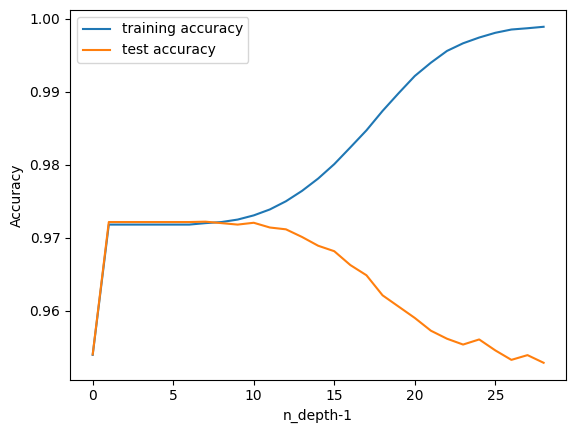

In [184]:
%matplotlib inline
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth-1")
plt.legend()

In [185]:
print(precision_score(y_test, y_pred_tree))
f1_score(y_test, y_pred_tree)

1.0


0.8051766351871283

In [186]:
recall_score(y_test, y_pred_tree)

0.6738875878220141

*Logistic Regression*

In [204]:
LR_model = LogisticRegression()
LR_model.fit(X_train_processed, y_train)

LogisticRegression()

In [205]:
LR_model.score(X_test_processed, y_test)

0.95895

In [207]:
y_test_pred = LR_model.predict(X_test_processed)

In [208]:
array = confusion_matrix(y_test, y_test_pred)

print('             Predicted Labels')
print('             |   0    |     1')
print('---------------------------------')
print('True label 0 | ',array[0][0],'|   ', (array[0][1]))
print('---------------------------------')
print('           1 | ',array[1][0],' |   ', (array[1][1]))

             Predicted Labels
             |   0    |     1
---------------------------------
True label 0 |  18133 |    159
---------------------------------
           1 |  662  |    1046


In [209]:
total = y_test.shape[0]

array = confusion_matrix(y_test, y_test_pred)
print('             Predicted Labels')
print('             |   A    |     B')
print('---------------------------------')
print('True label A | ',round((array[0][0]/total),2),'|   ', (array[0][1])/total)
print('---------------------------------')
print('           B | ',round((array[1][0]/total),2),' |   ', (array[1][1])/total)

             Predicted Labels
             |   A    |     B
---------------------------------
True label A |  0.91 |    0.00795
---------------------------------
           B |  0.03  |    0.0523


Text(0.5, 427.9555555555555, 'Predicted label')

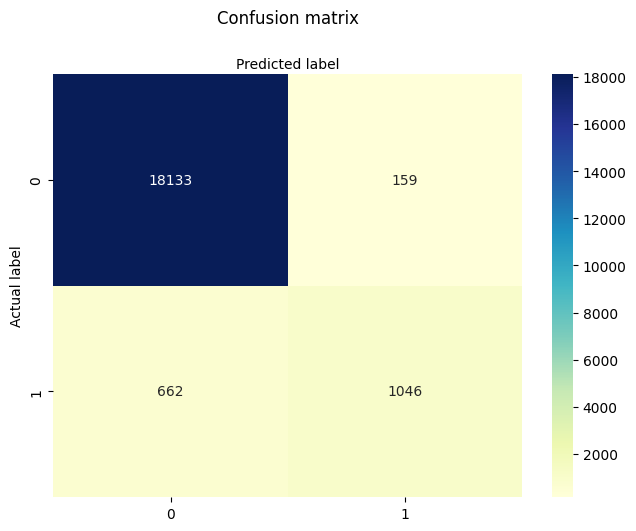

In [210]:
class_names=['without diabetes', 'with diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(array, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [211]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_test_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.96      0.99      0.98     18292
   with diabetes       0.87      0.61      0.72      1708

        accuracy                           0.96     20000
       macro avg       0.92      0.80      0.85     20000
    weighted avg       0.96      0.96      0.96     20000



In [193]:
no_diabetic = train[train["is_diabetic"] == 0]
yes_diabetic = train[train["is_diabetic"] == 1]

In [194]:
display(no_diabetic.shape)
display(yes_diabetic.shape)

(73208, 12)

(6792, 12)

In [195]:
yes_diabetic_oversampled = resample(yes_diabetic, 
                                    replace=True, 
                                    n_samples = len(no_diabetic),
                                    random_state=0)

In [196]:
display(no_diabetic.shape)
display(yes_diabetic_oversampled.shape)
yes_diabetic_oversampled.head(30)

(73208, 12)

(73208, 12)

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
32337,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7000,0.283706,0.545455,0.363636,1
30769,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8625,0.211588,0.400000,0.909091,1
19929,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.9125,0.211588,0.418182,0.359091,1
38241,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8875,0.319521,0.490909,0.636364,1
57760,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.7375,0.211588,0.963636,0.909091,1
56894,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9750,0.252536,0.472727,1.000000,1
68666,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.7500,0.264515,0.454545,0.545455,1
12510,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6750,0.253636,0.600000,0.227273,1
51401,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.7125,0.230901,0.600000,0.340909,1
69338,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6750,0.195086,0.963636,0.227273,1


In [197]:

train_oversampled = pd.concat([no_diabetic, yes_diabetic_oversampled], axis = 0)

display(train_oversampled.shape)
train_oversampled.head()

(146416, 12)

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.9125,0.180418,0.000000,0.000000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4750,0.175040,0.090909,0.354545,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.3250,0.108300,0.272727,0.090909,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.7625,0.147904,0.181818,0.022727,0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4250,0.115512,0.400000,0.209091,0


In [198]:
y_train_over = train_oversampled["is_diabetic"]
X_train_over = train_oversampled.drop("is_diabetic", axis = 1)

In [199]:
tree_model_over = DecisionTreeClassifier(max_depth = 2)
tree_model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=2)

In [200]:
y_pred_tree = tree_model_over.predict(X_test_processed)

In [201]:
tree_model_over.score(X_test_processed, y_test)

0.97215

In [202]:
array_tree = confusion_matrix(y_test, y_pred_tree)
total = y_test.shape[0]
print('             Predicted Labels')
print('             |   A    |     B')
print('---------------------------------')
print('True label A | ',round((array_tree[0][0]/total),2),'|   ', (array_tree[0][1])/total)
print('---------------------------------')
print('           B | ',round((array_tree[1][0]/total),2),' |   ', (array_tree[1][1])/total)

             Predicted Labels
             |   A    |     B
---------------------------------
True label A |  0.91 |    0.0
---------------------------------
           B |  0.03  |    0.05755


In [203]:
oversample_precision = precision_score(y_test,y_pred_tree)
oversample_recall = recall_score(y_test,y_pred_tree)
oversample_f1score = f1_score(y_test,y_pred_tree)

print("Oversampling precision: ", oversample_precision)
print("Oversampling recall: ",oversample_recall)
print("Oversampling f1: ",oversample_f1score)

Oversampling precision:  1.0
Oversampling recall:  0.6738875878220141
Oversampling f1:  0.8051766351871283
